Subsidy Inc. delivers subsidies to individuals based on their income. Accurate income data is one of the hardest pieces of data to obtain across the world. Subsidy Inc. has obtained a large data set of authenticated data on individual income, demographic parameters, and a few financial parameters.

Subsidy Inc. wishes us to :
Develop an income classifier system for individuals.

The objective Is to:
simplify the data system by reducing the number of variables to be studied, without sacrificing too much accuracy. such a system would help Subsidy Inc. in planning subsidy outlay, monitoring, and preventing misuse

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [2]:
data = pd.read_csv("dataset\income.csv", na_values=[" ?"])
# as there are a lot of ? in the dataset
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [3]:
data.describe(include="O")

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,30169,31978,31978,30162,31978,31978,31978,31978,31978
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [4]:
data['JobType'].value_counts().head()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
Name: JobType, dtype: int64

In [5]:
data['occupation'].value_counts().head()

 Prof-specialty     4038
 Craft-repair       4030
 Exec-managerial    3992
 Adm-clerical       3721
 Sales              3584
Name: occupation, dtype: int64

In [6]:
data[data.isnull().any(axis=1)].head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [7]:
data.dtypes

age               int64
JobType          object
EdType           object
maritalstatus    object
occupation       object
relationship     object
race             object
gender           object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
nativecountry    object
SalStat          object
dtype: object

In [8]:
# we drop all the null value entries
data = data.dropna(axis=0)

In [9]:
data.corr()

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


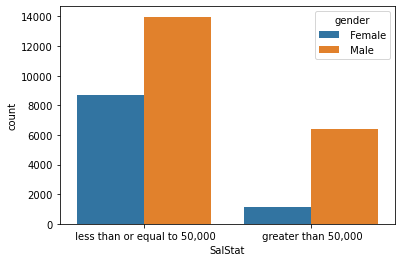

In [10]:
sns.countplot(x='SalStat', hue='gender', data=data);

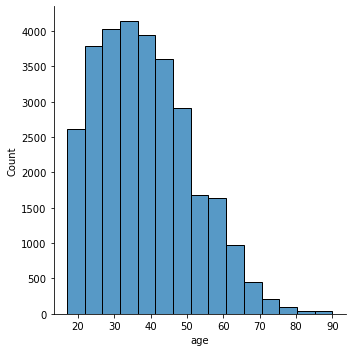

In [11]:
sns.displot(data['age'], bins=15, kde=False);

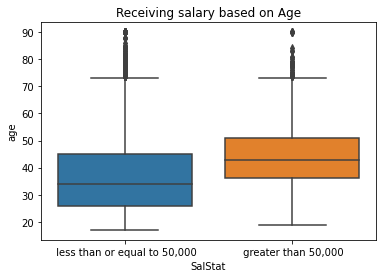

In [12]:
sns.boxplot(x='SalStat', y='age', data=data).set(title="Receiving salary based on Age");

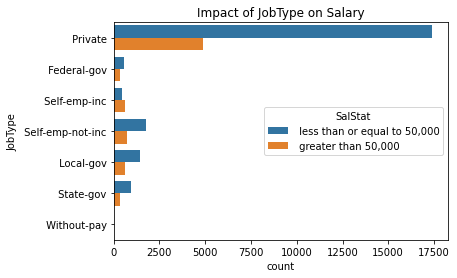

In [13]:
sns.countplot(y='JobType', hue='SalStat', data=data).set(title="Impact of JobType on Salary");

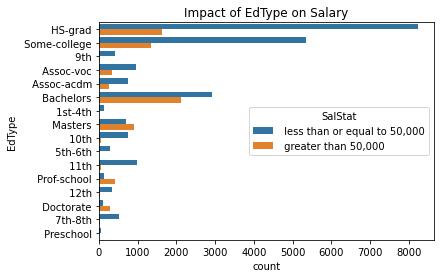

In [14]:
sns.countplot(y='EdType', hue='SalStat', data=data).set(title="Impact of EdType on Salary");

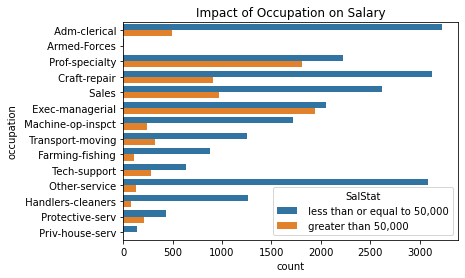

In [15]:
sns.countplot(y='occupation', hue='SalStat', data=data).set(title="Impact of Occupation on Salary");

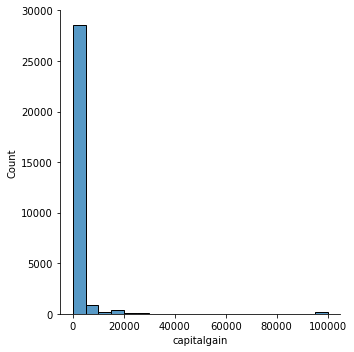

In [16]:
sns.displot(data['capitalgain'], bins=20, kde=False);

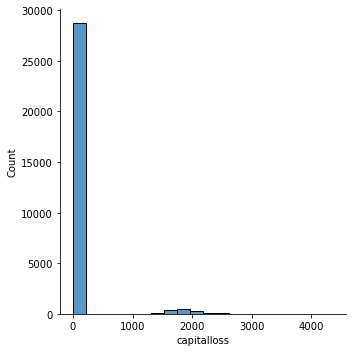

In [17]:
sns.displot(data['capitalloss'], bins=20, kde=False);

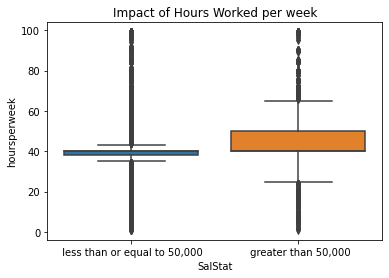

In [18]:
sns.boxplot(x='SalStat', y='hoursperweek', data=data).set(title="Impact of Hours Worked per week");

In [19]:
data['SalStat']=data['SalStat'].map({' less than or equal to 50,000':0, ' greater than 50,000':1})
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0


In [20]:
cat_data= data.select_dtypes('object')
for i in cat_data:
    data= data.drop(i, axis=1)

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
for i in cat_data:
    cat_data[i]=encoder.fit_transform(cat_data[i])
data= pd.concat([data,cat_data],axis=1)

In [22]:
# removing insignificant variables
data = data.drop(['gender', 'nativecountry', 'race', 'JobType'], axis=1)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [24]:
data = pd.get_dummies(data, drop_first=True)

In [25]:
y= data['SalStat']
x= data.drop(['SalStat'],axis=1)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=3)

In [26]:
model= RandomForestClassifier(random_state=0, max_depth=25, min_samples_split=1000)
model.fit(train_x, train_y)

RandomForestClassifier(max_depth=25, min_samples_split=1000, random_state=0)

In [27]:
preds= model.predict(test_x)
accuracy_score(test_y, preds)

0.8484915460271854

### <div style="text-align: right"> Developed by Mr. Ronik Dedhia</div>